# Digital Marketing Final 

## init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.ExcelFile("CompleteData.xlsm")
df.sheet_names

['Conversion Rate Raw',
 'Social - Medium Raw',
 'Social - Medium - Pivot',
 'SMAU',
 'SMID',
 'Channels - Pivot',
 'CAU',
 'CID',
 'Channel Raw']

In [2]:
Conversion_Rate_Raw = df.parse("Conversion Rate Raw")
Social_Medium_Raw = df.parse("Social - Medium Raw")
Social_Medium_Pivot_AU = df.parse("SMAU")
Social_Medium_Pivot_ID = df.parse("SMID")
Channels_Pivot_AU = df.parse("CAU")
Channels_Pivot_ID = df.parse("CID")
Channel_Raw = df.parse("Channel Raw")
Channel_Raw

,Country,Saras Channel Groupping,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,ID,Social,202106,48553,33324,72044,0.512506,3.868802,143.288865,0.002374,171,109475621
1,ID,Social,202107,14072,7550,23714,0.488150,4.402758,159.286202,0.004512,107,60522955
2,ID,Social,202108,125026,102289,146136,0.617165,3.188845,91.853931,0.002347,343,221458620
3,ID,Social,202109,284006,240588,351023,0.733502,2.609883,75.083402,0.002288,803,450904460
4,ID,Social,202110,859964,804860,1103039,0.845034,1.324728,45.983834,0.000028,31,33086100
...,...,...,...,...,...,...,...,...,...,...,...,...
212,AU,(Other),202201,6909,5557,9062,0.511300,3.260000,0.001181,0.0277,251,"A$36,275.57"
213,AU,(Other),202202,4466,3313,6266,0.386200,3.950000,0.001562,0.0354,222,"A$34,482.48"
214,AU,(Other),202203,20019,16952,28607,0.373000,4.000000,0.001551,0.0305,872,"A$132,336.27"
215,AU,(Other),202204,15390,12474,21372,0.460900,3.930000,0.001609,0.0392,837,"A$130,581.50"


# Cleaning

In [38]:
import datetime
Conversion_Rate_Raw["Month of Year1"] = Conversion_Rate_Raw["Month of Year"].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
Conversion_Rate_Raw_ID = Conversion_Rate_Raw.loc[Conversion_Rate_Raw["Country"]=="ID"]
Conversion_Rate_Raw_AU = Conversion_Rate_Raw.loc[Conversion_Rate_Raw["Country"]=="AU"]
Conversion_Rate_Raw_ID = Conversion_Rate_Raw_ID.sort_values(by="Month of Year1")
Conversion_Rate_Raw_AU = Conversion_Rate_Raw_AU.sort_values(by="Month of Year1")
print(Conversion_Rate_Raw_ID.shape)
Conversion_Rate_Raw_ID.head(2)

(12, 8)


,Country,Month of Year,Users,Sessions,Transactions,Ecommerce Conversion Rate,Transactions per User,Month of Year1
15,ID,202106,792284,990507,995,0.001,0.0013,2021-06-01
23,ID,202107,275316,389219,773,0.002,0.0028,2021-07-01


In [39]:
Social_Medium_Raw["Revenue1"] = Social_Medium_Raw["Revenue"].apply(lambda x: '{:.2f}'.format(float(x[2:].replace(",", ""))).rstrip("0") if type(x) == str else x)
Social_Medium_Raw["Month of Year1"] = Social_Medium_Raw["Month of Year"].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
Social_Medium_Raw_ID = Social_Medium_Raw.loc[Social_Medium_Raw["Country"]=="ID"]
Social_Medium_Raw_AU = Social_Medium_Raw.loc[Social_Medium_Raw["Country"]=="AU"]
Social_Medium_Raw_ID = Social_Medium_Raw_ID.sort_values(by="Month of Year1")
Social_Medium_Raw_AU = Social_Medium_Raw_AU.sort_values(by="Month of Year1")
print(Social_Medium_Raw_AU.shape)
Social_Medium_Raw_AU.head(2)

(148, 14)


,Country,Source,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Revenue1,Month of Year1
298,AU,YouTube,202106,140,136,153,0.7778,1.60,0.000718,0,0,A$0.00,0.,2021-06-01
299,AU,Instagram,202106,134,86,150,0.6467,2.35,0.000590,0,0,A$0.00,0.,2021-06-01


In [40]:
Channel_Raw["Revenue1"] = Channel_Raw["Revenue"].apply(lambda x: '{:.2f}'.format(float(x[2:].replace(",", ""))).rstrip("0") if type(x) == str else x)
Channel_Raw["Month of Year1"] = Channel_Raw["Month of Year"].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m'))
Channel_Raw_ID = Channel_Raw.loc[Channel_Raw["Country"]=="ID"]
Channel_Raw_AU = Channel_Raw.loc[Channel_Raw["Country"]=="AU"]
Channel_Raw_AU = Channel_Raw_AU.sort_values(by="Month of Year1")
Channel_Raw_ID = Channel_Raw_ID.sort_values(by="Month of Year1")
print(Channel_Raw_ID.shape)
Channel_Raw_ID.head(2)

(129, 14)


,Country,Saras Channel Groupping,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Revenue1,Month of Year1
0,ID,Social,202106,48553,33324,72044,0.512506,3.868802,143.288865,0.002374,171,109475621,109475621,2021-06-01
68,ID,NewsLetter,202106,10821,6857,22141,0.528838,4.213044,166.371934,0.006639,147,130753452.5,130753452.5,2021-06-01


In [41]:
print(Social_Medium_Pivot_AU.head(2),"\n")
print(Social_Medium_Pivot_ID.head(2))

     Source  Sum of Sessions  Sum of Transactions
0  Facebook           416054                 1228
1    TikTok           109994                   10 

     Source  Sum of Sessions  Sum of Transactions
0  Facebook          2670730                  448
1  whatsapp           472217                 1782


In [42]:
print(Channels_Pivot_AU.head(2),"\n")
print(Channels_Pivot_ID.head(2))

  Saras  Channel Groupping  Sum of Sessions  Sum of Transactions
0              Paid Search          1153284                19846
1           Organic Search          1080631                 9369 

  Saras  Channel Groupping  Sum of Sessions  Sum of Transactions
0                  Display          4262422                 1030
1                   Social          3745847                 2639


# Feature Engineering

In [43]:
Channel_Raw_ID

,Country,Saras Channel Groupping,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Revenue1,Month of Year1
0,ID,Social,202106,48553,33324,72044,0.512506,3.868802,143.288865,0.002374,171,109475621,109475621,2021-06-01
68,ID,NewsLetter,202106,10821,6857,22141,0.528838,4.213044,166.371934,0.006639,147,130753452.5,130753452.5,2021-06-01
56,ID,Organic Search,202106,9424,6738,15090,0.388801,5.607091,248.744268,0.005964,90,73615306,73615306,2021-06-01
104,ID,Direct,202106,11862,11479,16877,0.544587,4.230669,180.663388,0.006458,109,76633901.5,76633901.5,2021-06-01
92,ID,Display,202106,678900,578144,790871,0.885543,1.438529,26.096222,0.000253,200,112659871,112659871,2021-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,ID,Other Advertising,202205,5396,4116,5837,0.565702,2.533665,74.221175,0.001028,6,5149200,5149200,2022-05-01
79,ID,NewsLetter,202205,6546,3900,11784,0.548965,2.601663,84.949678,0.001527,18,17047700,17047700,2022-05-01
47,ID,Paid Search,202205,218911,192850,268776,0.717103,1.734519,48.510213,0.000301,81,107563900,107563900,2022-05-01
67,ID,Organic Search,202205,7790,5533,11277,0.428483,3.658065,161.517691,0.001774,20,19997400,19997400,2022-05-01


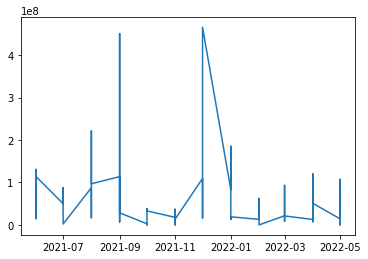

In [45]:
plt.plot(Channel_Raw_ID["Month of Year1"][:], Channel_Raw_ID["Revenue1"][:])

Text(0.5, 0, 'Source')

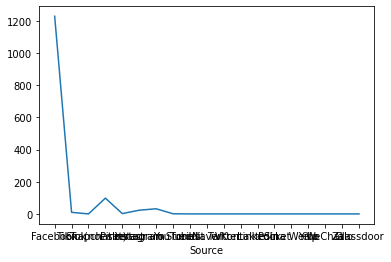

In [46]:
plt.plot(Social_Medium_Pivot_AU["Source"], Social_Medium_Pivot_AU["Sum of Transactions"])
plt.xlabel("Source")

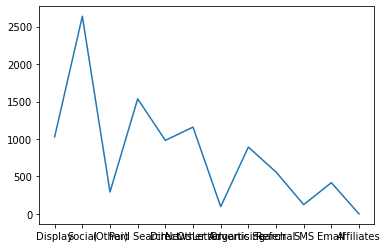

In [47]:
plt.plot(Channels_Pivot_ID["Saras  Channel Groupping"], Channels_Pivot_ID["Sum of Transactions"])


Index(['Country', 'Month of Year', 'Users', 'Sessions', 'Transactions',
       'Ecommerce Conversion Rate', 'Transactions per User', 'Month of Year1'],
      dtype='object')

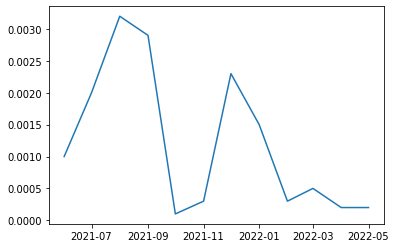

In [48]:
plt.plot(Conversion_Rate_Raw_ID["Month of Year1"][:], Conversion_Rate_Raw_ID["Ecommerce Conversion Rate"][:])
Conversion_Rate_Raw.columns

In [53]:
Channel_Raw_ID

,Country,Saras Channel Groupping,Month of Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue,Revenue1,Month of Year1
0,ID,Social,202106,48553,33324,72044,0.512506,3.868802,143.288865,0.002374,171,109475621,109475621,2021-06-01
68,ID,NewsLetter,202106,10821,6857,22141,0.528838,4.213044,166.371934,0.006639,147,130753452.5,130753452.5,2021-06-01
56,ID,Organic Search,202106,9424,6738,15090,0.388801,5.607091,248.744268,0.005964,90,73615306,73615306,2021-06-01
104,ID,Direct,202106,11862,11479,16877,0.544587,4.230669,180.663388,0.006458,109,76633901.5,76633901.5,2021-06-01
92,ID,Display,202106,678900,578144,790871,0.885543,1.438529,26.096222,0.000253,200,112659871,112659871,2021-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,ID,Other Advertising,202205,5396,4116,5837,0.565702,2.533665,74.221175,0.001028,6,5149200,5149200,2022-05-01
79,ID,NewsLetter,202205,6546,3900,11784,0.548965,2.601663,84.949678,0.001527,18,17047700,17047700,2022-05-01
47,ID,Paid Search,202205,218911,192850,268776,0.717103,1.734519,48.510213,0.000301,81,107563900,107563900,2022-05-01
67,ID,Organic Search,202205,7790,5533,11277,0.428483,3.658065,161.517691,0.001774,20,19997400,19997400,2022-05-01


In [ ]:
df2 = Channel_Raw_ID.groupby(['Month of Year1', 'Saras Channel Groupping'])['Revenue1'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True)